# Statistical Analysis on Combined Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("combined_df.csv")
df.head()

,Unnamed: 0,intake_method,referer,age,appointment_location,appointment_time,Medication_Management,Talk_Therapy
0,0,Call,Bariatric Doctor,20-30,Virtual,Evening,0,1
1,1,Call,Family/Friend,10-20,Virtual,Afternoon,0,1
2,2,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1
3,3,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1
4,4,Boom Form,Family/Friend,30-40,Freehold,Afternoon,0,1


In [ ]:
np.sum(df.isna())
# Find out why???

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Unnamed: 0,0
intake_method,1
referer,0
age,0
appointment_location,0
appointment_time,0
Medication_Management,0
Talk_Therapy,0


In [ ]:
df = df.dropna()

## Chi-Squared Tests
Running chi-squared tests on all categorical columnn with the appointment time

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
intake_method,object
referer,object
age,object
appointment_location,object
appointment_time,object
Medication_Management,int64
Talk_Therapy,int64


For the binary features Medication_Management and Talk_Therapy, the numerical values 0 and 1 represent "Yes" or "No". So, we need to convert the two into categorical features and then we can run Chi-Squared Test.

In [ ]:
df["Medication_Management"] = df["Medication_Management"].apply(lambda x : "Yes" if (x == 1) else "No")
df["Talk_Therapy"] = df["Talk_Therapy"].apply(lambda x : "Yes" if (x == 1) else "No")

Chi-squared will check if there is a difference in the distribution of appointment times for each category of the independent variable (which will be one of the other categorical variables)

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
indep_vars = ['intake_method', 'referer', 'age', 'appointment_location', "Medication_Management", "Talk_Therapy"]

# Columns that were found to be influencing appointment time
significant_cols = []

for col in indep_vars:
  contingency_all = pd.crosstab(df[col], df['appointment_time'])
  chi2, p, dof, expected = chi2_contingency(contingency_all)

  print(col)
  # If the distribution is the same it means that the appoinment time is independent of the
  # the independent variable.
  # If the distribution is different it means that the independent variable has some influence on the
  # appointment time.
  print(f"H0 : The distribution of appointment time for {list(df[col].unique())} categories is the same")
  print(f"H0 : The distribution of appointment time for {list(df[col].unique())} categories is different")
  print("Chi-square Statistic:", chi2)
  print("p value", p)

  if p <= 0.05:
    print('The independent variable likely has association with appointment time.')
   #unlikely to happen by change, so we reject null and say that there is an association with appointment time
    significant_cols.append(col)
  else:
    print('There is no significant evidence that there is an association between appointment time.')
    #this is saying that there is no evidence that the group depends on appointment time

  print("\n")

intake_method
H0 : The distribution of appointment time for ['Call', 'Boom Form', 'Text', 'Other', 'Waitlist', 'Unknown', 'Boom', 'Virtual'] categories is the same
H0 : The distribution of appointment time for ['Call', 'Boom Form', 'Text', 'Other', 'Waitlist', 'Unknown', 'Boom', 'Virtual'] categories is different
Chi-square Statistic: 113.81679200236238
p value 1.0142548362875723e-17
The independent variable likely has association with appointment time.


referer
H0 : The distribution of appointment time for ['Bariatric Doctor', 'Family/Friend', 'Google or another search engine', 'Healthcare Provider', 'Insurance Company', 'Internal TOL Referral ', 'IOP', 'Social Media', 'Unknown', 'Community Event', 'School District', "Alison D'Mello", 'Internal TOL Referral', 'Other', 'Following Clinician', 'Referred by Family/Friend', 'Referred by Insurance', 'Client of Alyssa', 'Google Referral', 'Client of Alexis', 'Client of Marissa', 'Non-Profit Organization', 'Referred by Family Member; GA conf

In [ ]:
print(significant_cols)

['intake_method', 'referer', 'age', 'appointment_location', 'Medication_Management', 'Talk_Therapy']


It seems that appointment time is dependent on all the categorical columns.

We can now see if these columns have an effect on whether the appointment time is a morning time or not.

### Chi-Squared for Binary Appointment Time Label (Morning = 1, Not Morning = 0)

In [ ]:
df['binary_time'] = df['appointment_time']
df['binary_time'] = df['binary_time'].apply(lambda x: 1 if x == 'Morning' else 0)
#this function converts appointment time to binary variable: morning vs not morning

In [ ]:
# Columns that were found to be influencing appointment time
significant_cols = []

for col in indep_vars:
  contingency_all = pd.crosstab(df[col], df['binary_time'])
  chi2, p, dof, expected = chi2_contingency(contingency_all)

  print(col)
  # If the distribution is the same it means that the appoinment time is independent of the
  # the independent variable.
  # If the distribution is different it means that the independent variable has some influence on the
  # appointment time.
  print(f"H0 : The distribution of morning appointment time for {list(df[col].unique())} categories is the same")
  print(f"H0 : The distribution of morning appointment time for {list(df[col].unique())} categories is different")
  print("Chi-square Statistic:", chi2)
  print("p value", p)

  if p <= 0.05:
    print('The independent variable likely has association with morning appointment time.')
   #unlikely to happen by change, so we reject null and say that there is an association with appointment time
    significant_cols.append(col)
  else:
    print('There is no significant evidence that there is an association between morning appointment time.')
    #this is saying that there is no evidence that the group depends on appointment time

  print("\n")

intake_method
H0 : The distribution of morning appointment time for ['Call', 'Boom Form', 'Text', 'Other', 'Waitlist', 'Unknown', 'Boom', 'Virtual'] categories is the same
H0 : The distribution of morning appointment time for ['Call', 'Boom Form', 'Text', 'Other', 'Waitlist', 'Unknown', 'Boom', 'Virtual'] categories is different
Chi-square Statistic: 46.82828942078426
p value 6.029425579456294e-08
The independent variable likely has association with morning appointment time.


referer
H0 : The distribution of morning appointment time for ['Bariatric Doctor', 'Family/Friend', 'Google or another search engine', 'Healthcare Provider', 'Insurance Company', 'Internal TOL Referral ', 'IOP', 'Social Media', 'Unknown', 'Community Event', 'School District', "Alison D'Mello", 'Internal TOL Referral', 'Other', 'Following Clinician', 'Referred by Family/Friend', 'Referred by Insurance', 'Client of Alyssa', 'Google Referral', 'Client of Alexis', 'Client of Marissa', 'Non-Profit Organization', 'Refe

In [ ]:
print(significant_cols)

['intake_method', 'age', 'appointment_location', 'Medication_Management', 'Talk_Therapy']


We see that 'intake_method', 'age', 'appointment_location', 'Medication_Management', and 'Talk_Therapy' seem to some effect on whether the client chooses morning times or not.

## Graphs
Using segmented bar charts to see the distribution of morning and non-morning appointment types based on different variables.

#### Intake Method

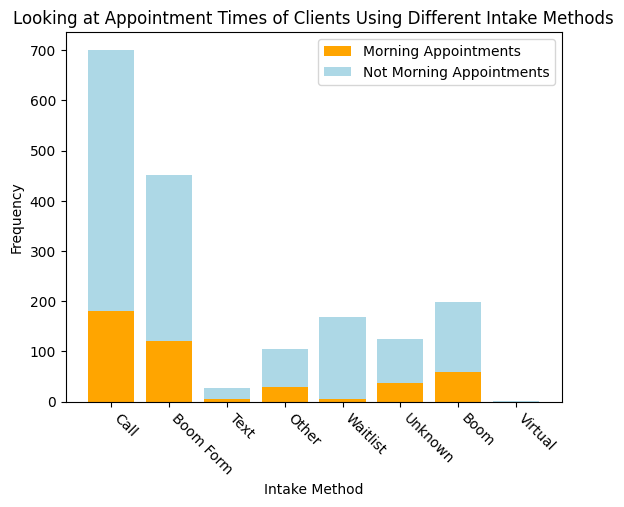

In [ ]:
# graphing appointment time and intake method

x = list(df['intake_method'].unique())
morning = []
not_morning = []
for category in x:
  cat_filtered = df[df['intake_method'] == category]
  morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
  not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
  morning.append(morning_len)
  not_morning.append(not_morning_len)

plt.bar(x, morning, color='orange', label = "Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label = "Not Morning Appointments")
plt.xlabel('Intake Method')
plt.ylabel('Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Looking at Appointment Times of Clients Using Different Intake Methods')
plt.legend()
plt.show()

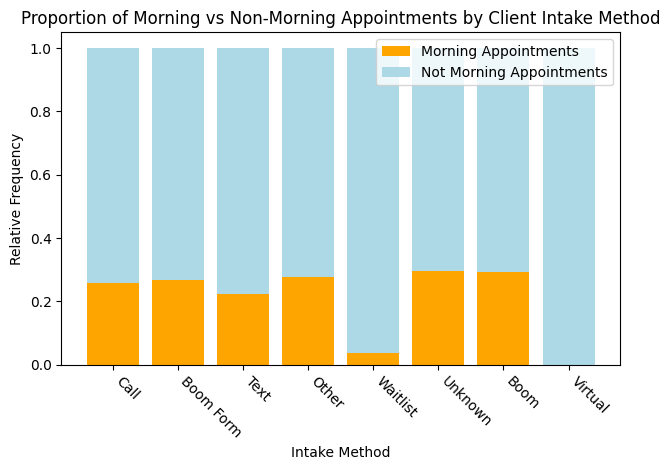

In [ ]:
# graphing appointment time and intake method

x = list(df['intake_method'].unique())
morning = []
not_morning = []

for category in x:
    cat_filtered = df[df['intake_method'] == category]
    morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
    not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
    total = morning_len + not_morning_len

    # Avoid division by zero
    if total == 0:
        morning.append(0)
        not_morning.append(0)
    else:
        morning.append(morning_len / total)
        not_morning.append(not_morning_len / total)

plt.bar(x, morning, color='orange', label="Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label="Not Morning Appointments")

plt.xlabel('Intake Method')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Proportion of Morning vs Non-Morning Appointments by Client Intake Method')
plt.legend()
plt.tight_layout()
plt.show()

#### Age

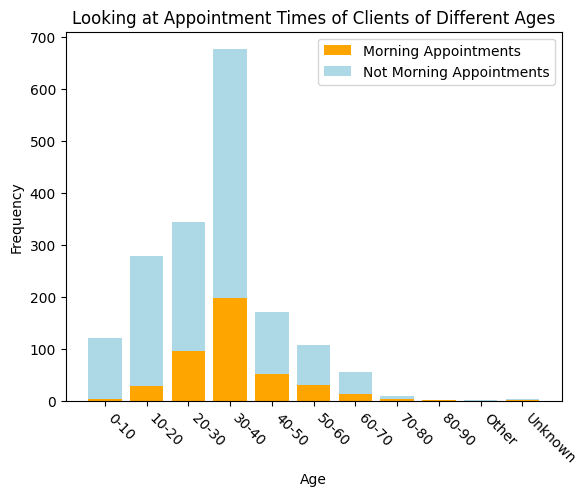

In [ ]:
# graphing appointment time and age

x = list(df['age'].unique())
x.sort()
morning = []
not_morning = []
for category in x:
  cat_filtered = df[df['age'] == category]
  morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
  not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
  morning.append(morning_len)
  not_morning.append(not_morning_len)

plt.bar(x, morning, color='orange', label = "Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label = "Not Morning Appointments")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Looking at Appointment Times of Clients of Different Ages')
plt.legend()
plt.show()

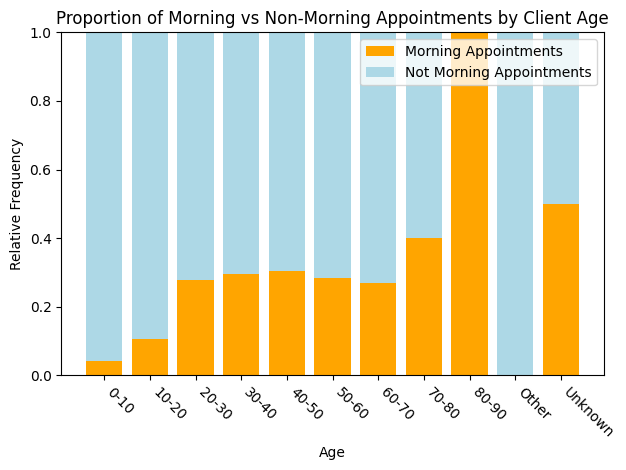

In [ ]:
x = list(df['age'].unique())
x.sort()
morning = []
not_morning = []

for category in x:
    cat_filtered = df[df['age'] == category]
    morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
    not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
    total = morning_len + not_morning_len

    # Avoid division by zero
    if total == 0:
        morning.append(0)
        not_morning.append(0)
    else:
        morning.append(morning_len / total)
        not_morning.append(not_morning_len / total)

plt.bar(x, morning, color='orange', label="Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label="Not Morning Appointments")

plt.xlabel('Age')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Proportion of Morning vs Non-Morning Appointments by Client Age')
plt.legend()
plt.tight_layout()
plt.show()

Based on the graph above, it seems that a greater proportion of older people prefer morning times but there are also less older clients. The greatest number of morning clients currently come from the age category of 30 - 40. It might be worth trying to target older people and see if they still prefer morning times.

### Appointment Location

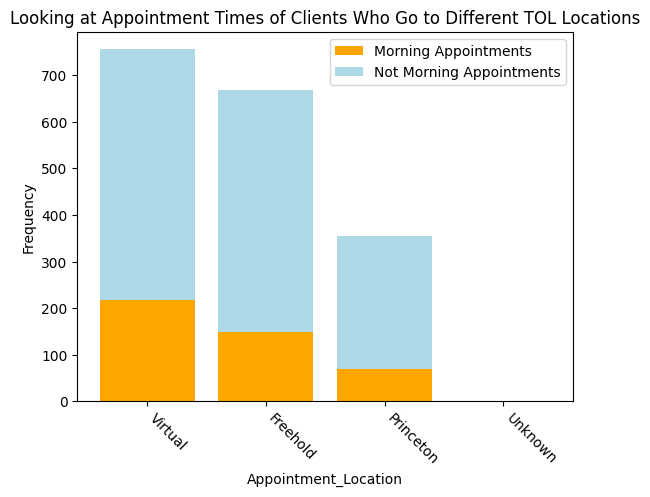

In [ ]:
# graphing appointment time and appointment location

x = list(df['appointment_location'].unique())
morning = []
not_morning = []
for category in x:
  cat_filtered = df[df['appointment_location'] == category]
  morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
  not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
  morning.append(morning_len)
  not_morning.append(not_morning_len)

plt.bar(x, morning, color='orange', label = "Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label = "Not Morning Appointments")
plt.xlabel('Appointment_Location')
plt.ylabel('Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Looking at Appointment Times of Clients Who Go to Different TOL Locations')
plt.legend()
plt.show()

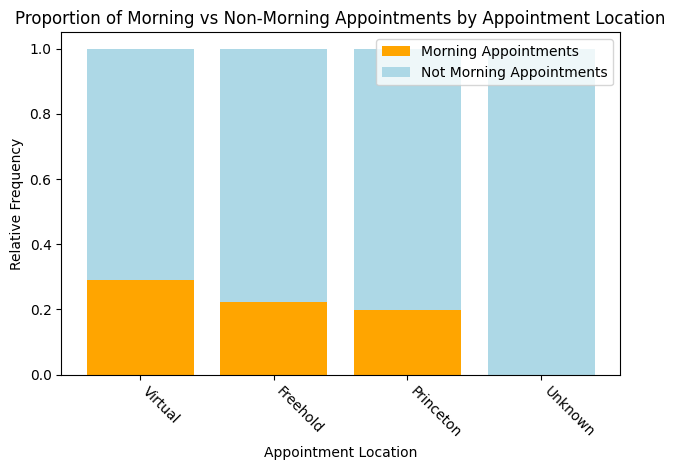

In [ ]:
x = list(df['appointment_location'].unique())
morning = []
not_morning = []

for category in x:
    cat_filtered = df[df['appointment_location'] == category]
    morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
    not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
    total = morning_len + not_morning_len

    # Avoid division by zero
    if total == 0:
        morning.append(0)
        not_morning.append(0)
    else:
        morning.append(morning_len / total)
        not_morning.append(not_morning_len / total)

plt.bar(x, morning, color='orange', label="Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label="Not Morning Appointments")

plt.xlabel('Appointment Location')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Proportion of Morning vs Non-Morning Appointments by Appointment Location')
plt.legend()
plt.tight_layout()
plt.show()

Based on the results above, it seems that more virtual clients prefer morning times comare to the other appointment locations. However, according the data at hand, this difference isn't by much.

#### Medication Management Appointment Type

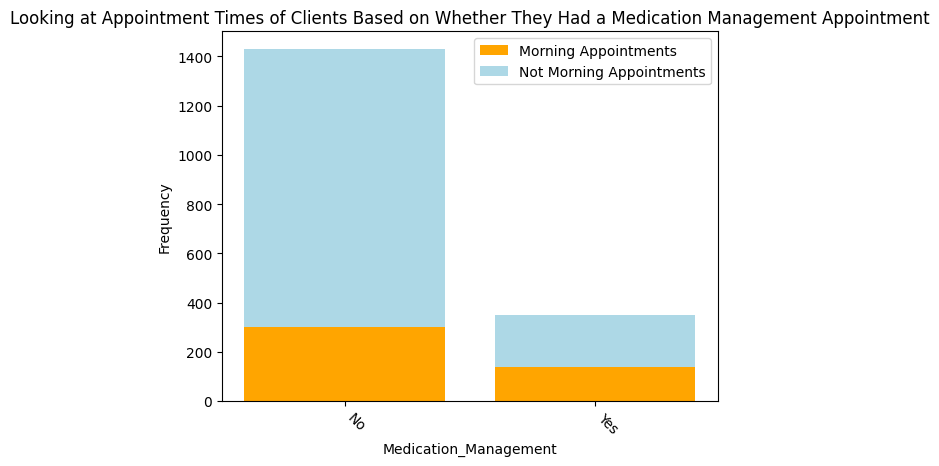

In [ ]:
# graphing appointment time and Medication_Management

x = list(df['Medication_Management'].unique())
morning = []
not_morning = []
for category in x:
  cat_filtered = df[df['Medication_Management'] == category]
  morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
  not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
  morning.append(morning_len)
  not_morning.append(not_morning_len)

plt.bar(x, morning, color='orange', label = "Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label = "Not Morning Appointments")
plt.xlabel('Medication_Management')
plt.ylabel('Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Looking at Appointment Times of Clients Based on Whether They Had a Medication Management Appointment')
plt.legend()
plt.show()

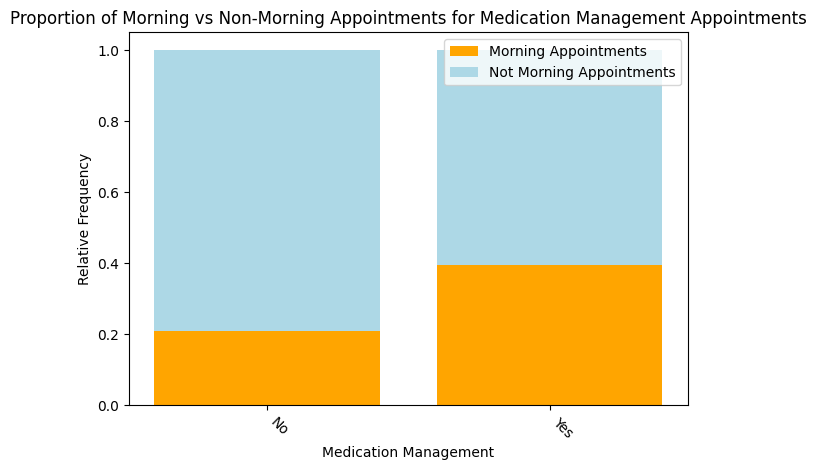

In [ ]:
x = list(df['Medication_Management'].unique())
morning = []
not_morning = []

for category in x:
    cat_filtered = df[df['Medication_Management'] == category]
    morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
    not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
    total = morning_len + not_morning_len

    # Avoid division by zero
    if total == 0:
        morning.append(0)
        not_morning.append(0)
    else:
        morning.append(morning_len / total)
        not_morning.append(not_morning_len / total)

plt.bar(x, morning, color='orange', label="Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label="Not Morning Appointments")

plt.xlabel('Medication Management')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Proportion of Morning vs Non-Morning Appointments for Medication Management Appointments')
plt.legend()
plt.tight_layout()
plt.show()

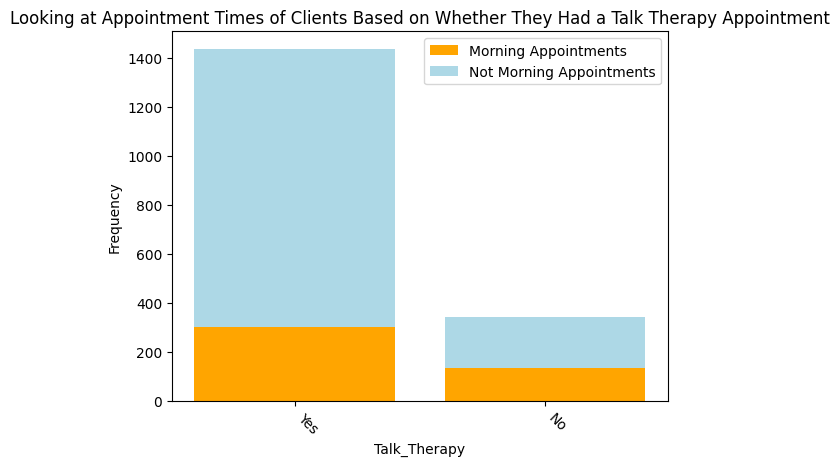

In [ ]:
# graphing appointment time and Talk Therapy

x = list(df['Talk_Therapy'].unique())
morning = []
not_morning = []
for category in x:
  cat_filtered = df[df['Talk_Therapy'] == category]
  morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
  not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
  morning.append(morning_len)
  not_morning.append(not_morning_len)

plt.bar(x, morning, color='orange', label = "Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label = "Not Morning Appointments")
plt.xlabel('Talk_Therapy')
plt.ylabel('Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Looking at Appointment Times of Clients Based on Whether They Had a Talk Therapy Appointment')
plt.legend()
plt.show()

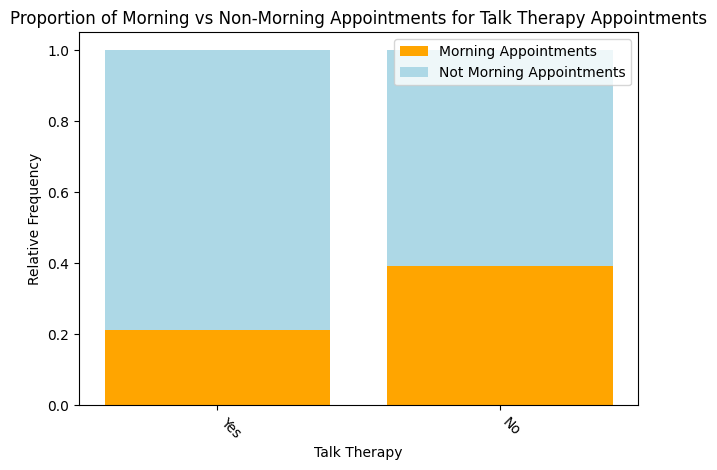

In [ ]:
x = list(df['Talk_Therapy'].unique())
morning = []
not_morning = []

for category in x:
    cat_filtered = df[df['Talk_Therapy'] == category]
    morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
    not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
    total = morning_len + not_morning_len

    # Avoid division by zero
    if total == 0:
        morning.append(0)
        not_morning.append(0)
    else:
        morning.append(morning_len / total)
        not_morning.append(not_morning_len / total)

plt.bar(x, morning, color='orange', label="Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label="Not Morning Appointments")

plt.xlabel('Talk Therapy')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Proportion of Morning vs Non-Morning Appointments for Talk Therapy Appointments')
plt.legend()
plt.tight_layout()
plt.show()

Based on the graphs above, it seems that a higher proportion of Medication Management appointments are scheduled in the morning.

**Note** : The Medication Management and Talk Therapy appointment types are not completely mutually exculsive.

**Note** : All the 'Unknown' Category variables represent the ages that were missing.

# Referrers and Morning Appointments

According to the Statistical Tests above, referrer does not have much of an influence on morning times. But here is the visualization for each refererence source and the number/proportion of morning appointments from that source.

In [ ]:
df_new = df.groupby('referer')['binary_time'].sum().reset_index()
df_new = df_new.sort_values(by = 'binary_time', ascending=False).reset_index(drop = True)
df_new

,referer,binary_time
0,Family/Friend,99
1,Unknown,97
2,Healthcare Provider,70
3,Google or another search engine,43
4,Insurance Company,34
5,Other,32
6,Social Media,20
7,Internal TOL Referral,14
8,Following Clinician,11
9,Private Practice Therapist,6


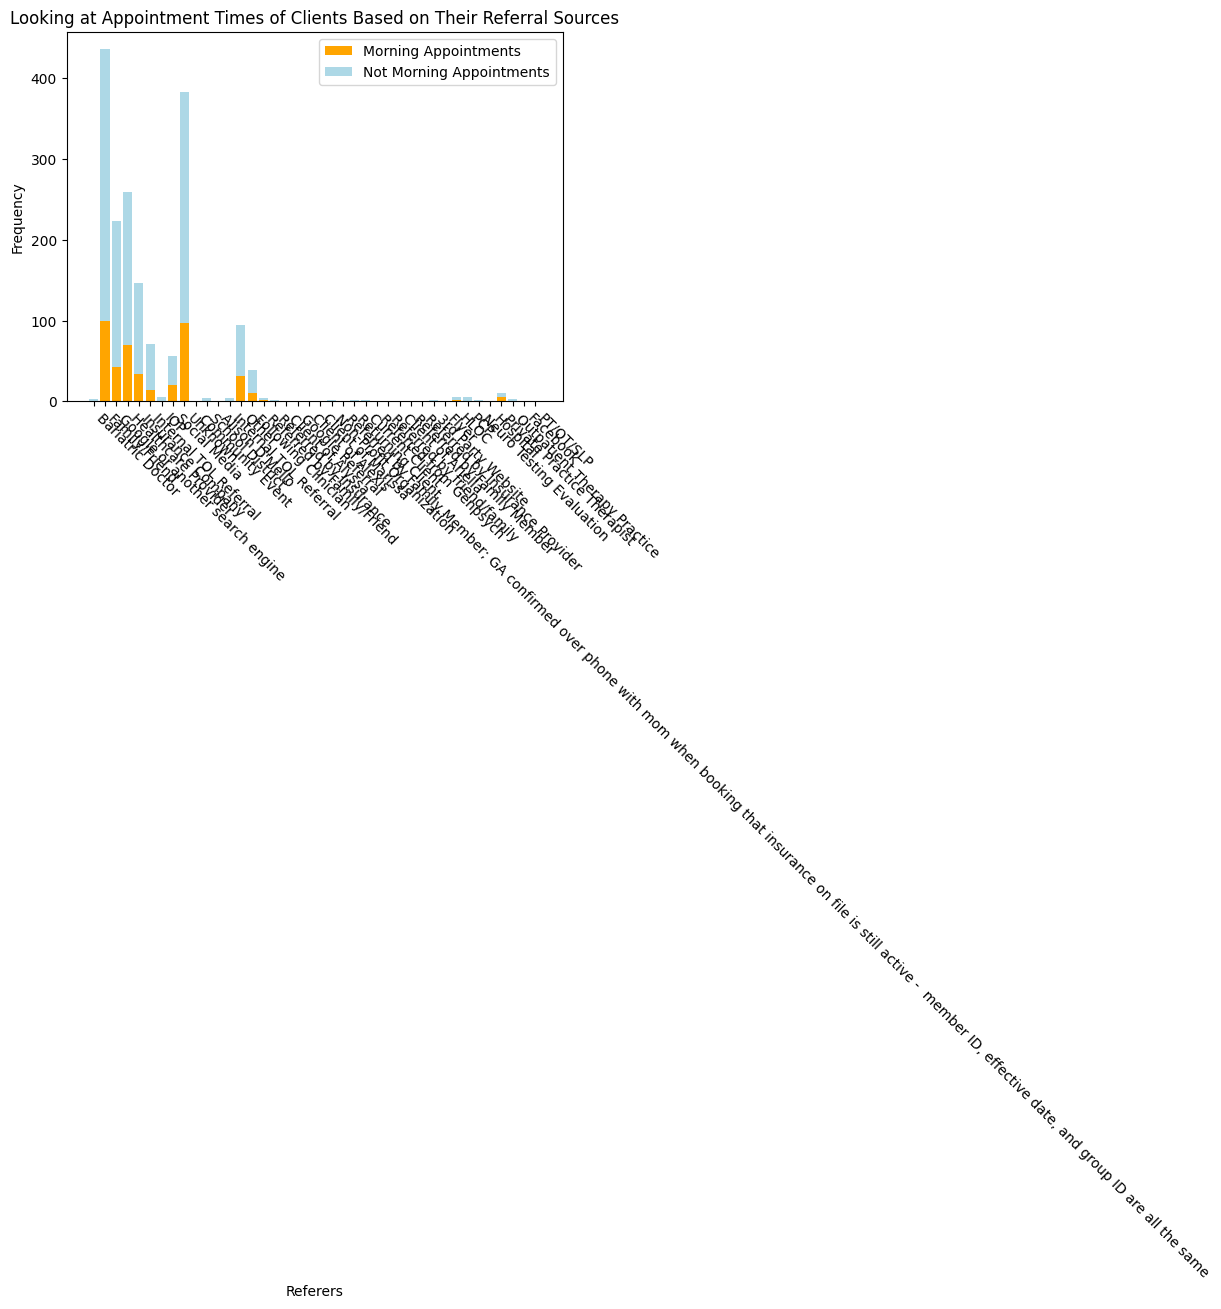

In [ ]:
# graphing appointment time and Talk Therapy

x = list(df['referer'].unique())
morning = []
not_morning = []
for category in x:
  cat_filtered = df[df['referer'] == category]
  morning_len = len(cat_filtered[cat_filtered['binary_time'] == 1])
  not_morning_len = len(cat_filtered[cat_filtered['binary_time'] == 0])
  morning.append(morning_len)
  not_morning.append(not_morning_len)

plt.bar(x, morning, color='orange', label = "Morning Appointments")
plt.bar(x, not_morning, bottom=morning, color='lightblue', label = "Not Morning Appointments")
plt.xlabel('Referers')
plt.ylabel('Frequency')
plt.xticks(rotation=315, ha='left')
plt.title('Looking at Appointment Times of Clients Based on Their Referral Sources')
plt.legend()
plt.show()